<a href="https://colab.research.google.com/github/deveshsharma09/Yes-Bank-Stock-Closing-Price-Prediction/blob/main/Yes_Bank_Stock_Closing_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -



##### **Project Type**    - EDA/Regression/Classification/Unsupervised
##### **Contribution**    - Individual/Team
##### **Team Member 1 -**


# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**Write Problem Statement Here.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Dataset Loading

In [2]:
# Load Dataset
df = pd.read_csv('/content/yesbank dataset.csv')

### Dataset First View

In [3]:
# Dataset First Look
df.head(10)

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41
5,Dec-05,13.49,14.44,13.00,13.71
6,Jan-06,13.68,17.16,13.58,15.33
7,Feb-06,15.50,16.97,15.40,16.12
8,Mar-06,16.20,20.95,16.02,20.08
9,Apr-06,20.56,20.80,18.02,19.49


### Dataset Rows & Columns count

In [4]:
# Dataset Rows & Columns count
num_rows, num_columns = df.shape
print("Number of rows:", num_rows)
print("Number of columns:", num_columns)

Number of rows: 185
Number of columns: 5


### Dataset Information

In [5]:
# Dataset Info
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB
None


#### Duplicate Values

In [6]:
# Dataset Duplicate Value Count
duplicate_count = df.duplicated().sum()

print("Number of duplicate rows in the dataset:", duplicate_count)

Number of duplicate rows in the dataset: 0


#### Missing Values/Null Values

In [7]:
# Missing Values/Null Values Count
missing_values_count = df.isnull().sum()

print("Number of missing/null values in each column:")
print(missing_values_count)

Number of missing/null values in each column:
Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64


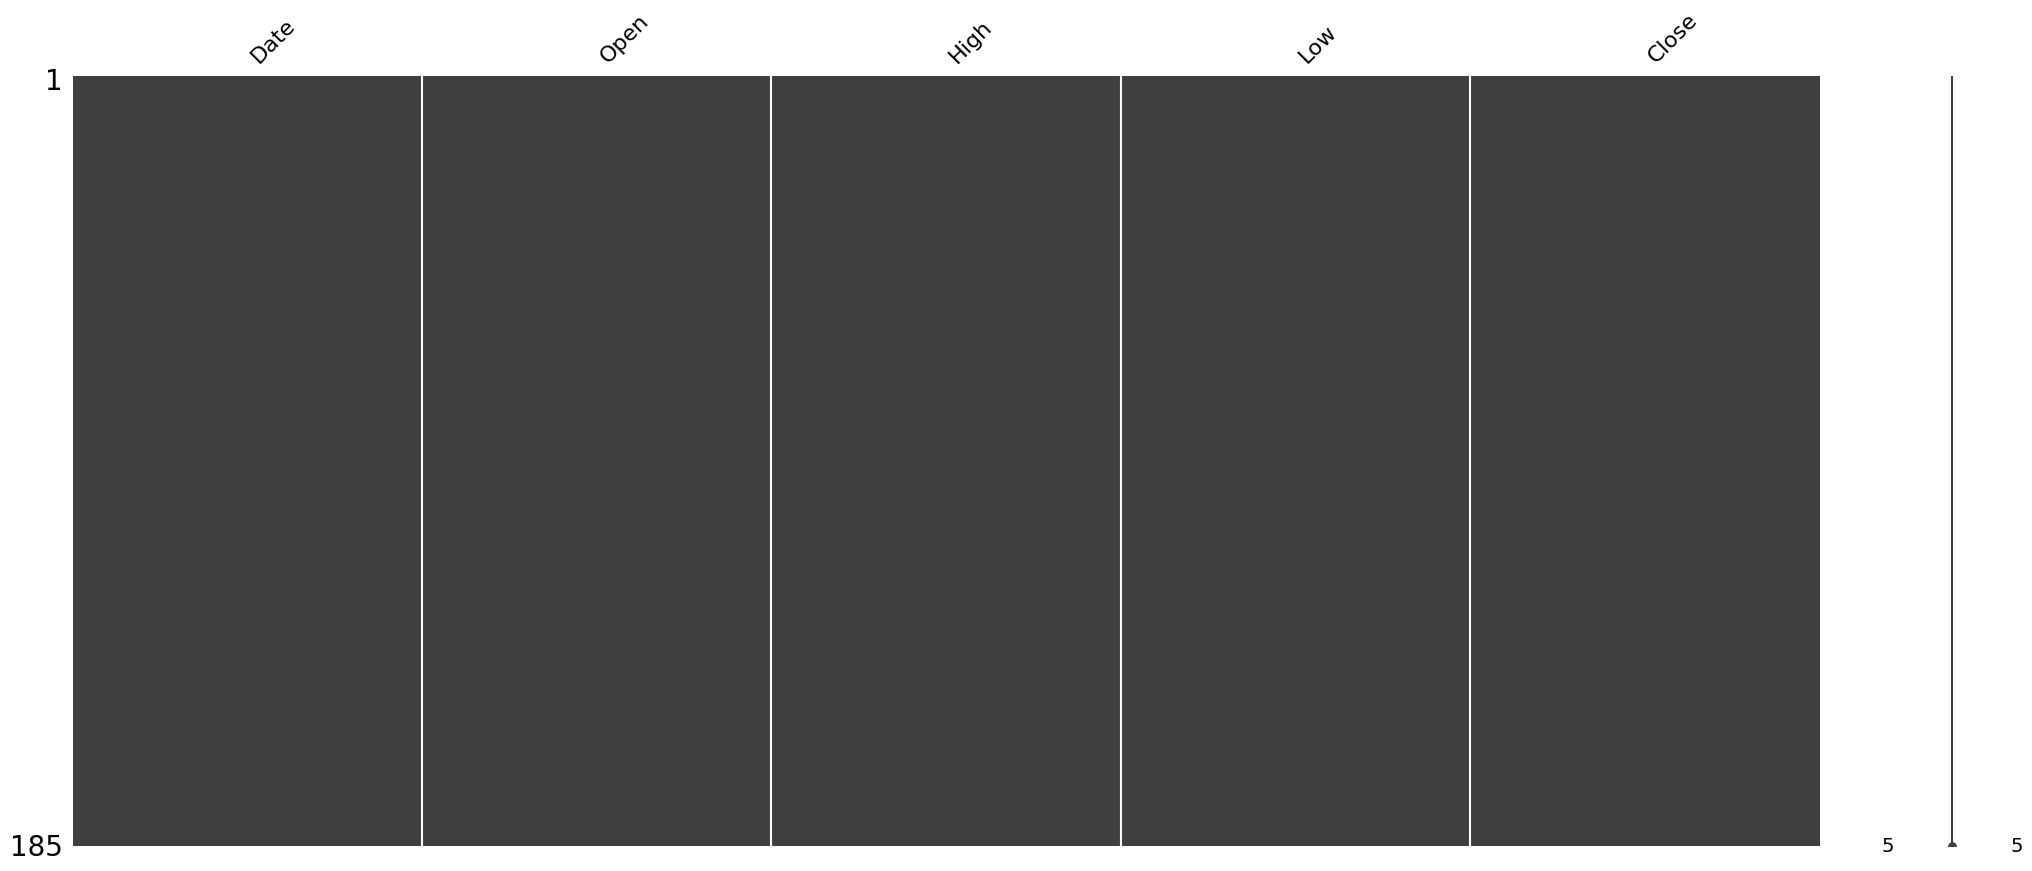

In [8]:
# Visualizing the missing values
import missingno as msno
import matplotlib.pyplot as plt

msno.matrix(df)
plt.show()

### What did you know about your dataset?

Answer Here

## ***2. Understanding Your Variables***

In [9]:
# Dataset Columns
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close'], dtype='object')

In [10]:
# Dataset Describe
print(df.describe())

             Open        High         Low       Close
count  185.000000  185.000000  185.000000  185.000000
mean   105.541405  116.104324   94.947838  105.204703
std     98.879850  106.333497   91.219415   98.583153
min     10.000000   11.240000    5.550000    9.980000
25%     33.800000   36.140000   28.510000   33.450000
50%     62.980000   72.550000   58.000000   62.540000
75%    153.000000  169.190000  138.350000  153.300000
max    369.950000  404.000000  345.500000  367.900000


### Variables Description

Answer Here

### Check Unique Values for each variable.

In [11]:
# Check Unique Values for each variable.
unique_values_per_variable = {}
for column in df.columns:
    unique_values_per_variable[column] = df[column].unique()

for column, unique_values in unique_values_per_variable.items():
    print(f"Unique values for {column}:")
    print(unique_values)


Unique values for Date:
['Jul-05' 'Aug-05' 'Sep-05' 'Oct-05' 'Nov-05' 'Dec-05' 'Jan-06' 'Feb-06'
 'Mar-06' 'Apr-06' 'May-06' 'Jun-06' 'Jul-06' 'Aug-06' 'Sep-06' 'Oct-06'
 'Nov-06' 'Dec-06' 'Jan-07' 'Feb-07' 'Mar-07' 'Apr-07' 'May-07' 'Jun-07'
 'Jul-07' 'Aug-07' 'Sep-07' 'Oct-07' 'Nov-07' 'Dec-07' 'Jan-08' 'Feb-08'
 'Mar-08' 'Apr-08' 'May-08' 'Jun-08' 'Jul-08' 'Aug-08' 'Sep-08' 'Oct-08'
 'Nov-08' 'Dec-08' 'Jan-09' 'Feb-09' 'Mar-09' 'Apr-09' 'May-09' 'Jun-09'
 'Jul-09' 'Aug-09' 'Sep-09' 'Oct-09' 'Nov-09' 'Dec-09' 'Jan-10' 'Feb-10'
 'Mar-10' 'Apr-10' 'May-10' 'Jun-10' 'Jul-10' 'Aug-10' 'Sep-10' 'Oct-10'
 'Nov-10' 'Dec-10' 'Jan-11' 'Feb-11' 'Mar-11' 'Apr-11' 'May-11' 'Jun-11'
 'Jul-11' 'Aug-11' 'Sep-11' 'Oct-11' 'Nov-11' 'Dec-11' 'Jan-12' 'Feb-12'
 'Mar-12' 'Apr-12' 'May-12' 'Jun-12' 'Jul-12' 'Aug-12' 'Sep-12' 'Oct-12'
 'Nov-12' 'Dec-12' 'Jan-13' 'Feb-13' 'Mar-13' 'Apr-13' 'May-13' 'Jun-13'
 'Jul-13' 'Aug-13' 'Sep-13' 'Oct-13' 'Nov-13' 'Dec-13' 'Jan-14' 'Feb-14'
 'Mar-14' 'Apr-14' 'May-14'

## 3. ***Data Wrangling***

### Data Wrangling Code

In [12]:
# Convert the 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'], format='%b-%y')

# Now 'Date' column is converted to datetime data type


In [ ]:
# Convert the 'Date' column to datetime
#df['Date'] = pd.to_datetime(df['Date'], format='%b-%y')

# Add a day and year component to the date strings
#df['Full_Date'] = df['Date'].dt.strftime('%Y-%m') + '-01'  # Assuming all dates are from the year 2005

# Convert the 'Full_Date' column to datetime
#df['Date'] = pd.to_datetime(df['Full_Date'])

# Drop the 'Full_Date' column if it's no longer needed
#df.drop(columns=['Full_Date'], inplace=True)

# Now you can proceed with the rest of the data wrangling steps


In [ ]:
#from sklearn.preprocessing import LabelEncoder
#label_encoder = LabelEncoder()
#for column in df.select_dtypes(include=['object']).columns:
 #   df[column] = label_encoder.fit_transform(df[column])

In [13]:
# Write your code to make your dataset analysis ready.

# 1. Handle Missing Values
#df.dropna(inplace=True)  # Drop rows with missing values
df.fillna(df.mean(), inplace=True)
df.fillna(df.mode().iloc[0], inplace=True)

# 2. Convert Data Types
df['Date'] = pd.to_datetime(df['Date'])  # Convert Date column to datetime

# 3. Handle Duplicates
df.drop_duplicates(inplace=True)  # Remove duplicate rows

# 4. Feature Engineering (if applicable)
# For example, extract year and month from the Date column
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
label_encoder = LabelEncoder()
for column in df.select_dtypes(include=['object']).columns:
    df[column] = label_encoder.fit_transform(df[column])

# 5. Normalize or Scale Data (if applicable)
# For example, use Min-Max scaling on numerical columns
#from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[['Open', 'High', 'Low', 'Close']] = scaler.fit_transform(df[['Open', 'High', 'Low', 'Close']])

# 6. Handle Outliers (if applicable)
# For example, winsorize outliers in the 'Close' column
from scipy.stats import mstats
df['Close'] = mstats.winsorize(df['Close'], limits=[0.05, 0.05])

# Display the modified DataFrame
print(df.head())


        Date      Open      High       Low     Close  Year  Month
0 2005-07-01  0.008334  0.007027  0.016767  0.009276  2005      7
1 2005-08-01  0.007168  0.009268  0.020591  0.009611  2005      8
2 2005-09-01  0.009668  0.009242  0.019768  0.009276  2005      9
3 2005-10-01  0.008890  0.008224  0.020150  0.009276  2005     10
4 2005-11-01  0.009307  0.006722  0.021562  0.009583  2005     11


### What all manipulations have you done and insights you found?

Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

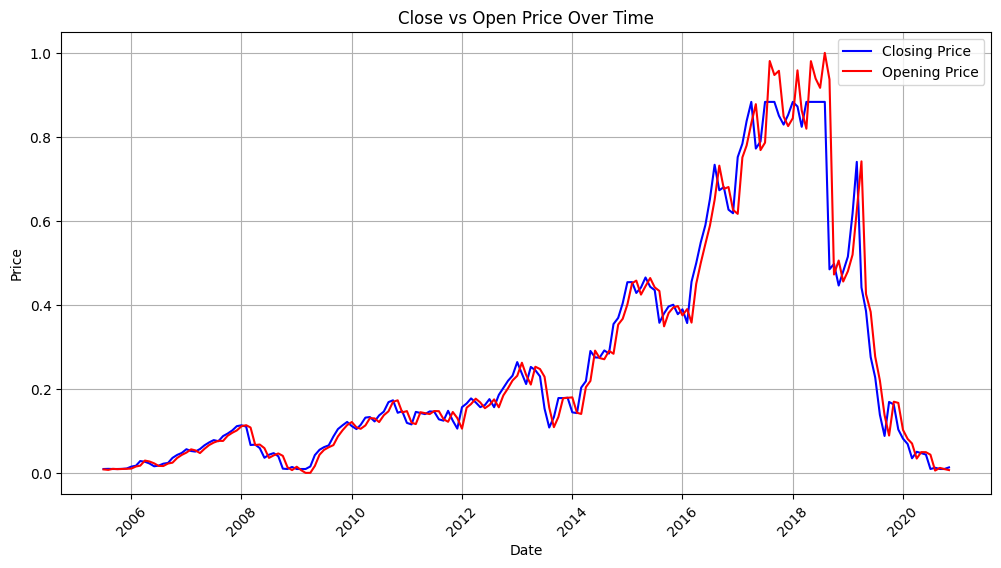

In [14]:
# Chart - 1 visualization code

import matplotlib.pyplot as plt

# Sort the DataFrame by the 'Date' column
df_sorted = df.sort_values(by='Date')

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(df_sorted['Date'], df_sorted['Close'], label='Closing Price', color='blue')
plt.plot(df_sorted['Date'], df_sorted['Open'], label='Opening Price', color='red')
plt.title('Close vs Open Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 2

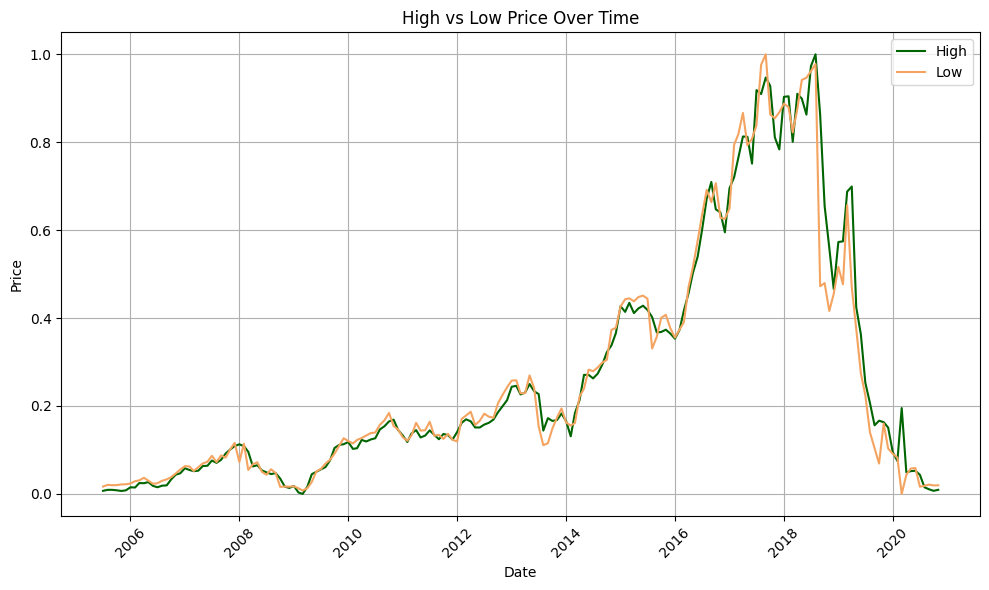

In [43]:
# Chart - 2 visualization code

import matplotlib.pyplot as plt

# Plot High vs Low Price over Time
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['High'], color='darkgreen', label='High', linestyle='-')
plt.plot(df['Date'], df['Low'], color='sandybrown', label='Low', linestyle='-')
plt.title('High vs Low Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3

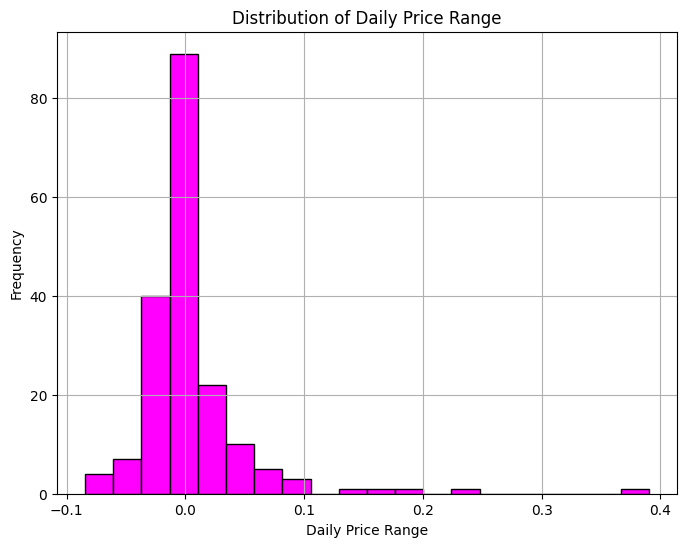

In [20]:
# Chart - 3 visualization code
import matplotlib.pyplot as plt

# Calculate daily price range
df['Daily_Price_Range'] = df['High'] - df['Low']

# Plot histogram of daily price range
plt.figure(figsize=(8, 6))
plt.hist(df['Daily_Price_Range'], bins=20, color='magenta', edgecolor='black')
plt.title('Distribution of Daily Price Range')
plt.xlabel('Daily Price Range')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

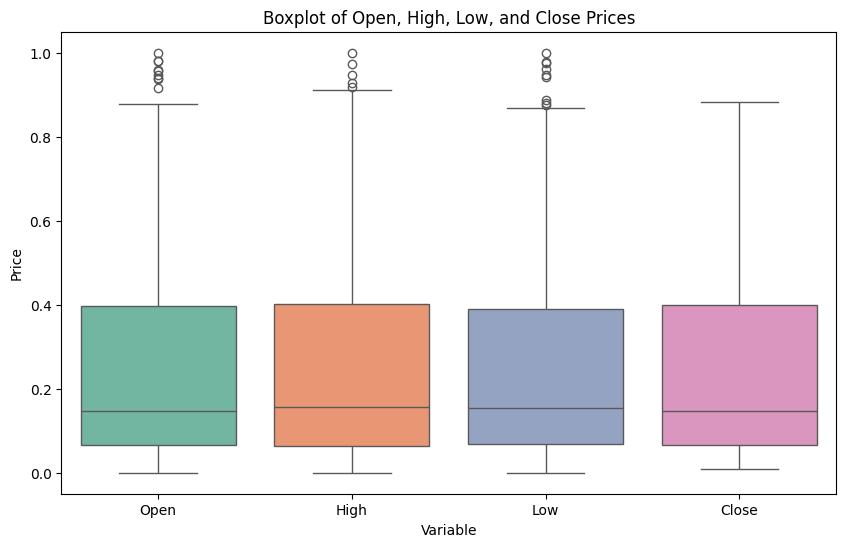

In [24]:
# Chart - 4 visualization code
import seaborn as sns
import matplotlib.pyplot as plt

# Create a boxplot of Open, High, Low, and Close prices
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['Open', 'High', 'Low', 'Close']], palette='Set2')
plt.title('Boxplot of Open, High, Low, and Close Prices')
plt.ylabel('Price')
plt.xlabel('Variable')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

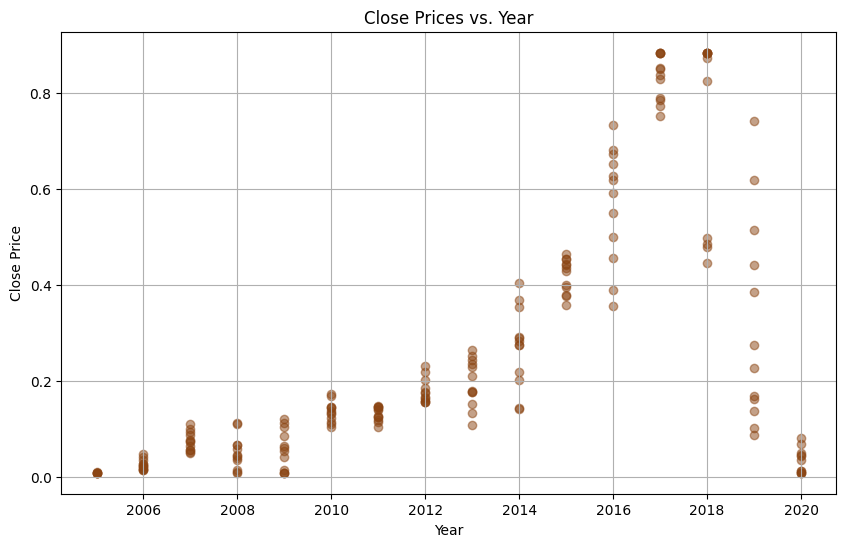

In [33]:
# Chart - 5 visualization code
import matplotlib.pyplot as plt

# Extract year from the 'Date' column
df['Year'] = df['Date'].dt.year

# Create scatter plot of Close prices vs. Year
plt.figure(figsize=(10, 6))
plt.scatter(df['Year'], df['Close'], color='saddlebrown', alpha=0.5)
plt.title('Close Prices vs. Year')
plt.xlabel('Year')
plt.ylabel('Close Price')
plt.grid(True)
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

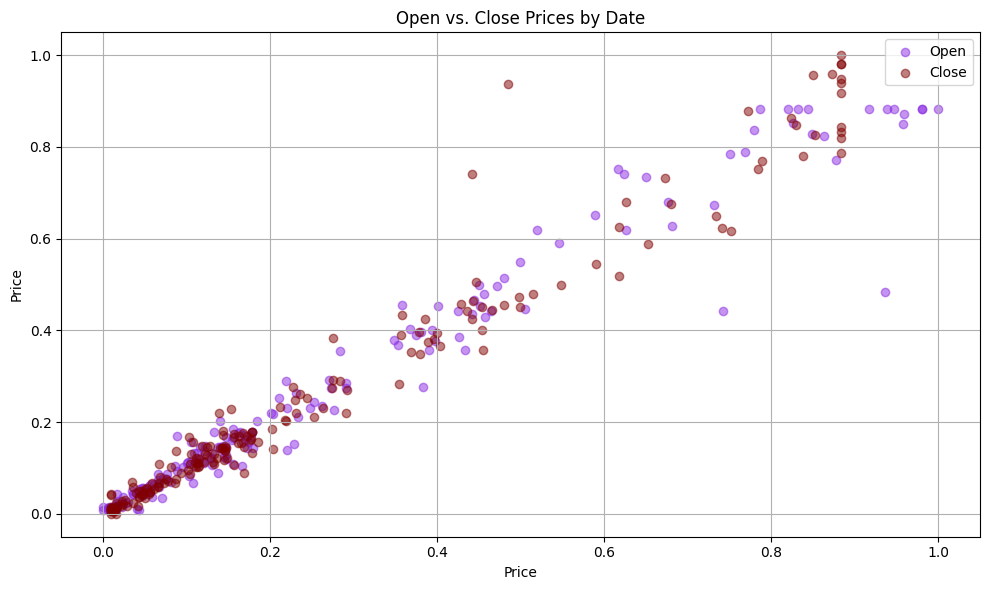

In [48]:
# Chart - 6 visualization code
import matplotlib.pyplot as plt

# Create scatter plot of Open vs. Close prices by Date
plt.figure(figsize=(10, 6))

# Scatter plot for Open prices
plt.scatter(df['Open'], df['Close'], color='blueviolet', alpha=0.5, label='Open')

# Scatter plot for Close prices
plt.scatter(df['Close'], df['Open'], color='maroon', alpha=0.5, label='Close')

plt.title('Open vs. Close Prices by Date')
plt.xlabel('Price')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

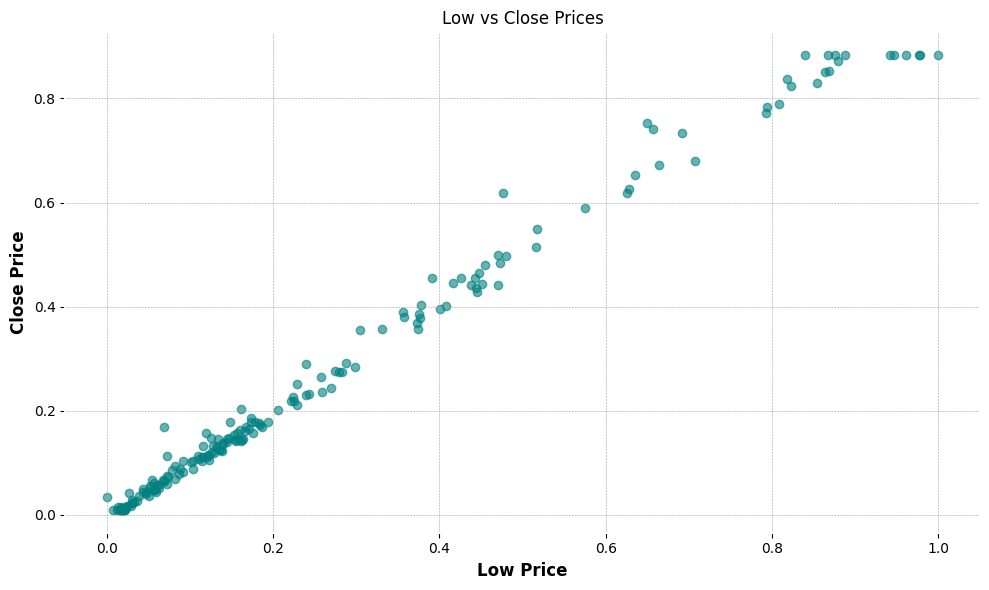

In [94]:
# Chart - 7 visualization code
import matplotlib.pyplot as plt

# Plot Low vs Close
plt.figure(figsize=(10, 6))
plt.scatter(df['Low'], df['Close'], color='teal', alpha=0.6)
plt.title('Low vs Close Prices')
plt.xlabel('Low Price')
plt.ylabel('Close Price')
plt.grid(True)
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

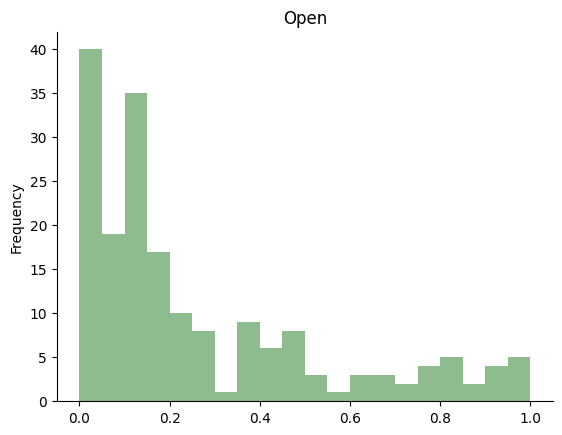

In [59]:
# Chart - 8 visualization code
from matplotlib import pyplot as plt
df['Open'].plot(kind='hist', bins=20, title='Open', color= 'darkseagreen')
plt.gca().spines[['top', 'right',]].set_visible(False)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

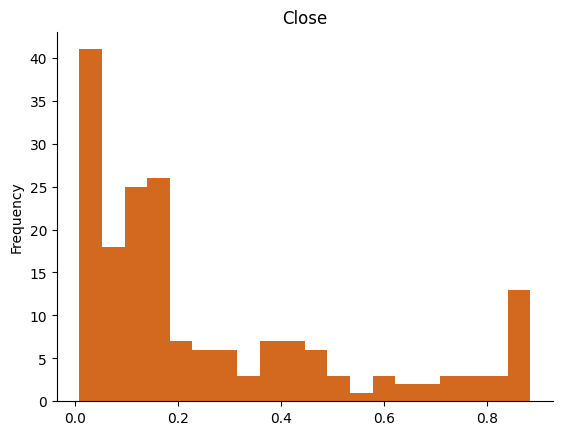

In [60]:
# Chart - 9 visualization code
from matplotlib import pyplot as plt
df['Close'].plot(kind='hist', bins=20, title='Close', color= 'chocolate')
plt.gca().spines[['top', 'right',]].set_visible(False)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

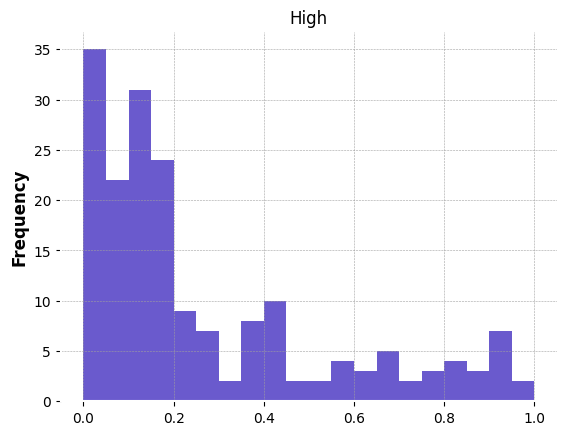

In [83]:
# Chart - 10 visualization code
from matplotlib import pyplot as plt
df['High'].plot(kind='hist', bins=20, title='High', color = 'slateblue')
plt.gca().spines[['top', 'right',]].set_visible(False)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

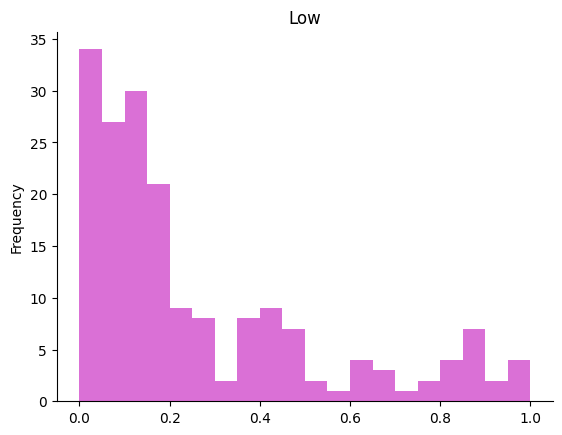

In [69]:
# Chart - 11 visualization code
from matplotlib import pyplot as plt
df['Low'].plot(kind='hist', bins=20, title='Low', color = 'orchid')
plt.gca().spines[['top', 'right',]].set_visible(False)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

<Axes: title={'center': 'Open, High, and Low Price Comparison'}, xlabel='Date'>

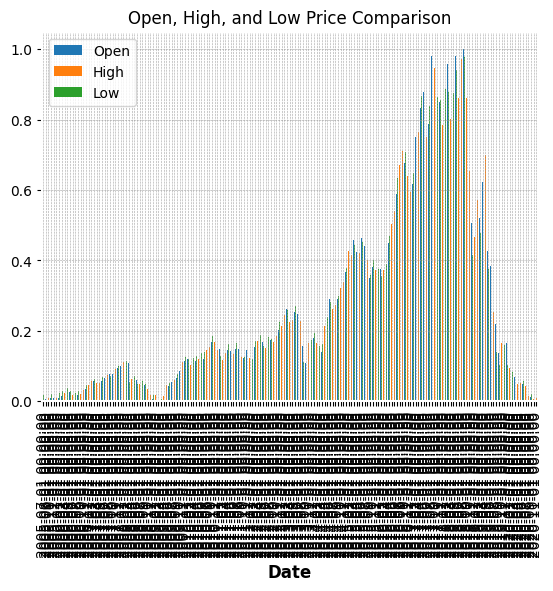

In [79]:
# Chart - 12 visualization code

df.plot.bar(x='Date', y=['Open', 'High', 'Low'], title='Open, High, and Low Price Comparison')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [76]:
pip install mplfinance


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 2.5 MB/s eta 0:00:00


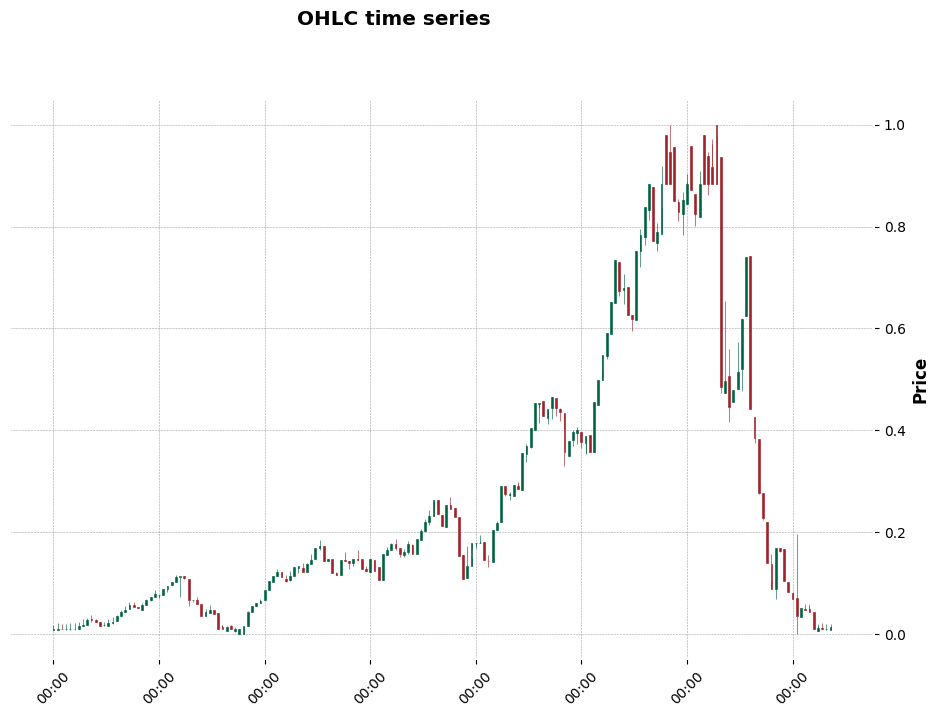

In [96]:
# Chart - 13 visualization code

#OHLC time series

import mplfinance as mpf

# Convert the date index to datetime
df.index = pd.to_datetime(df.index)

# Plot OHLC data as a candlestick chart
mpf.plot(df, type='candle', style='charles', title = 'OHLC time series', ylabel='Price', ylabel_lower='Volume', figsize=(12, 8))

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

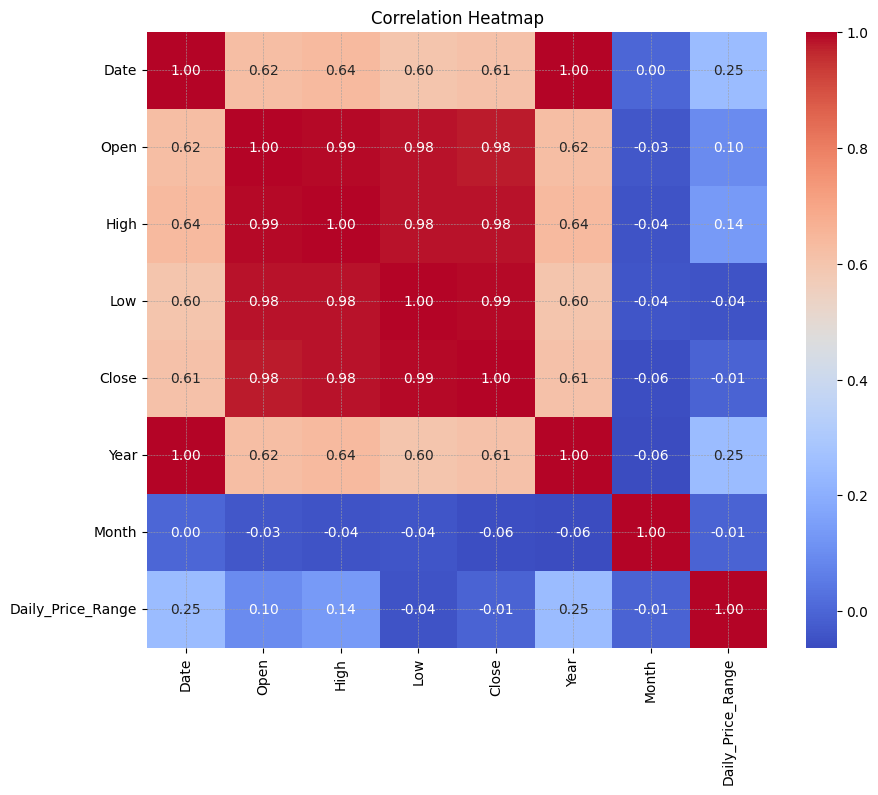

In [81]:
# Correlation Heatmap visualization code
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Heatmap')
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot

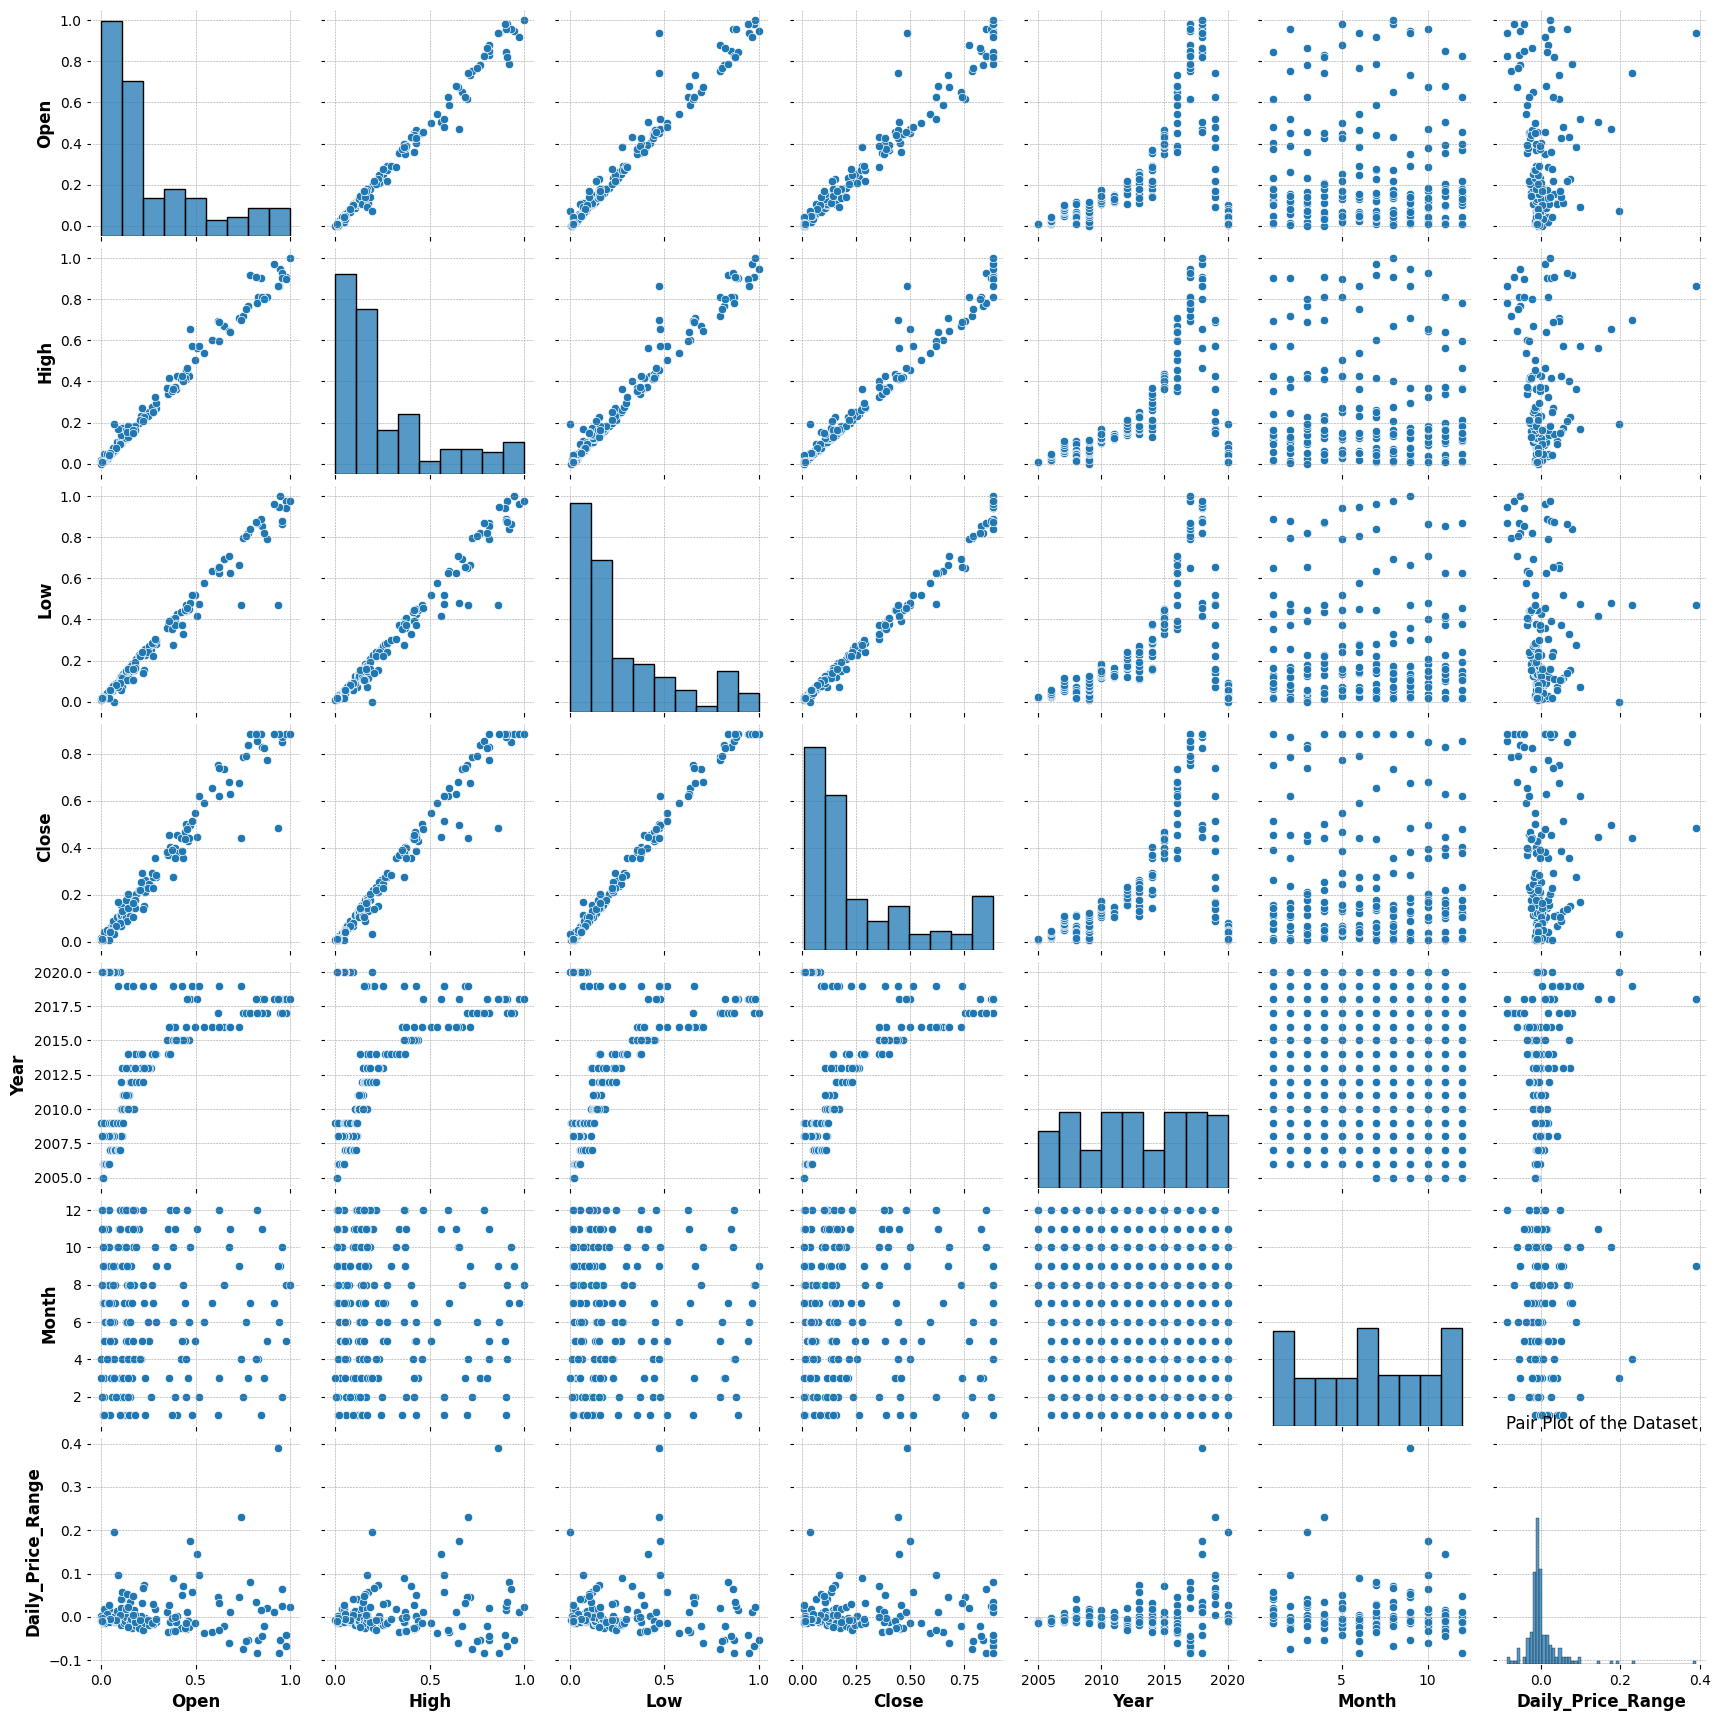

In [82]:
# Pair Plot visualization code
import seaborn as sns
import matplotlib.pyplot as plt

# Create a pair plot
sns.pairplot(df)
plt.title('Pair Plot of the Dataset')
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

###The average Close price is significantly different from the average Open price.

#### 2. Perform an appropriate statistical test.

In [97]:
# Perform Statistical Test to obtain P-Value

from scipy.stats import ttest_ind

# Extract Close and Open prices
close_prices = df['Close']
open_prices = df['Open']

# Perform two-sample t-test
t_stat, p_value = ttest_ind(close_prices, open_prices, equal_var=False)

print("Two-Sample T-Test Results:")
print("T-statistic:", t_stat)
print("P-value:", p_value)


Two-Sample T-Test Results:
T-statistic: -0.10113051897536172
P-value: 0.91950198064579


##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

### There is a significant correlation between High and Low prices.

#### 2. Perform an appropriate statistical test.

In [98]:
# Perform Statistical Test to obtain P-Value

from scipy.stats import pearsonr

# Extract High and Low prices
high_prices = df['High']
low_prices = df['Low']

# Perform Pearson correlation test
corr_coef, p_value = pearsonr(high_prices, low_prices)

print("Pearson Correlation Test Results:")
print("Correlation Coefficient:", corr_coef)
print("P-value:", p_value)


Pearson Correlation Test Results:
Correlation Coefficient: 0.9834220453868541
P-value: 1.1963769489304133e-137


##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

### The distribution of Close prices is significantly different between the first and second halves of the dataset.

#### 2. Perform an appropriate statistical test.

In [99]:
# Perform Statistical Test to obtain P-Value

from scipy.stats import ks_2samp

# Split the dataset into two halves
midpoint = len(df) // 2
first_half_close = df['Close'][:midpoint]
second_half_close = df['Close'][midpoint:]

# Perform two-sample KS test
statistic, p_value = ks_2samp(first_half_close, second_half_close)

print("Two-Sample KS Test Results:")
print("KS Statistic:", statistic)
print("P-value:", p_value)


Two-Sample KS Test Results:
KS Statistic: 0.708976157082749
P-value: 2.6141026117911157e-23


##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [101]:
# Handling Missing Values & Missing Value Imputation




#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction

#### 2. Lower Casing

In [ ]:
# Lower Casing

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

In [ ]:
# Remove White spaces

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data

### 6. Data Scaling

In [ ]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why?

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***